In [1]:
import sys
sys.path.append('/project2/alvinjin_1630/results')

from Trainer import Trainer

Note: you may need to restart the kernel to use updated packages.
/project2/alvinjin_1630/pcx
Skipping virtualenv creation, as specified in config file.
Installing dependencies from lock file

Package operations: 55 installs, 1 update, 0 removals

  - Installing numpy (2.2.4): Pending...
  - Installing numpy (2.2.4): Installing...
Installing /home1/adshaw/.local/bin/f2py over existing file
Installing /home1/adshaw/.local/bin/numpy-config over existing file
Installing /home1/adshaw/.local/lib/python3.11/site-packages/numpy-2.2.4.dist-info/METADATA over existing file
Installing /home1/adshaw/.local/lib/python3.11/site-packages/numpy-2.2.4.dist-info/LICENSE.txt over existing file
Installing /home1/adshaw/.local/lib/python3.11/site-packages/numpy-2.2.4.dist-info/entry_points.txt over existing file
Installing /home1/adshaw/.local/lib/python3.11/site-packages/numpy-2.2.4.dist-info/WHEEL over existing file
Installing /home1/adshaw/.local/lib/python3.11/site-packages/numpy/_configtool.py over 

In [2]:
import torch, jax
print("PyTorch sees:", torch.cuda.device_count(), "GPUs,", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "none")
print("JAX sees:", jax.devices())

PyTorch sees: 0 GPUs, none
JAX sees: [CpuDevice(id=0)]


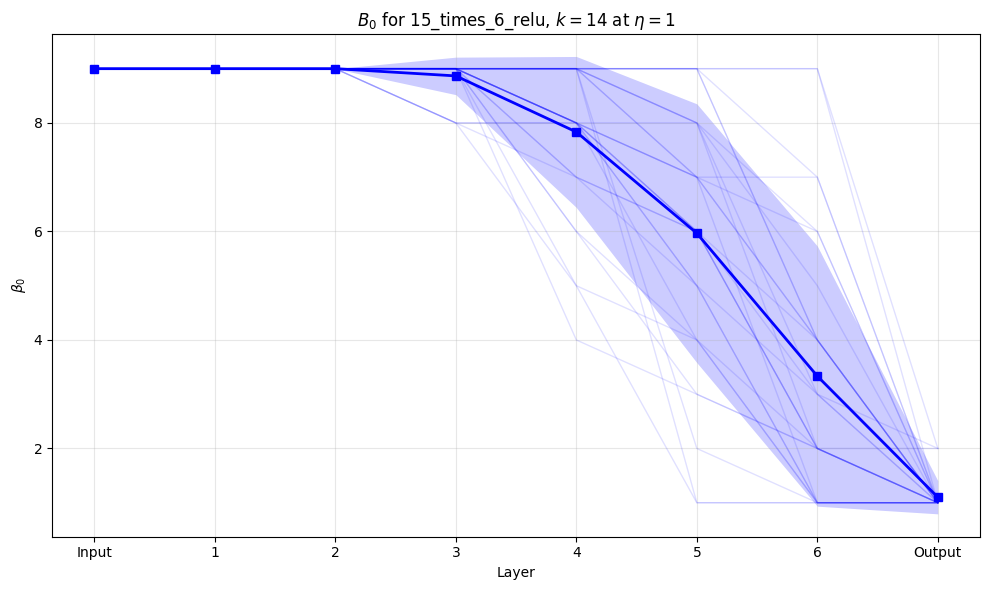

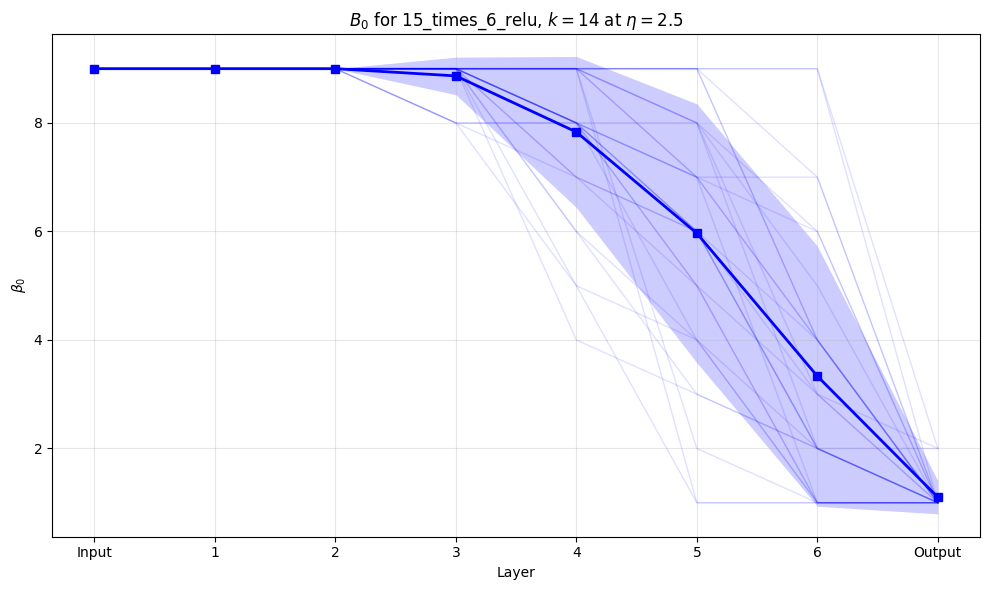

In [3]:
trainer = Trainer(
    dataset='D1',
    hidden_dims=[15]*6,
    act_fn=jax.nn.relu,
    study_name='15_times_6_relu',
    residual=False
)

# trainer.run_optuna(
#     num_models=3,
#     T_func=lambda trial: trial.suggest_int('T', 15, 29, step=7),
#     start_lr_w_func=lambda trial: trial.suggest_float('lr_w', 1e-5, 1e-2, log=True),
#     start_lr_h_func=lambda trial: trial.suggest_float('lr_h', 1e-4, 5e-1, log=True),
#     trans_mult_func=lambda trial: trial.suggest_float('trans_mult', 3, 20),
#     decay_rate_func=lambda trial: trial.suggest_float('decay_rate', 0.85, 0.99)
# )

# trainer.train_all_models(
#     T=22,
#     start_lr_w=6.737e-4,
#     start_lr_h=7.594e-2,
#     trans_mult=13.16,
#     decay_rate=0.9856
# )

# import dill
# with open(f'{trainer.root}/only_0_25_percent.dill', 'rb') as f:
#     only_0 = dill.load(f)

# trainer.run_ripser(
#     dataset=only_0,
#     dir_name='ripser_only_0_k14',
#     k=14,
#     maxdim=0,
#     thresh=5
# )

trainer.graph_betti_numbers(dir_name='ripser_only_0_k14', k=14, etas=[1, 2.5], maxdim=0)